## Veri Normalizasyon Teknikleri
Bu laboratuvar çalışmasında şunları gerçekleştireceksiniz:

Bu laboratuvar çalışmasında, veri normalizasyonuna odaklanacaksınız. Bu, tazminatla ilgili sütunların belirlenmesini, normalizasyon tekniklerinin uygulanmasını ve veri dağılımlarının görselleştirilmesini içerir.

Yinelenen satırları belirleyin ve kaldırın.

Anahtar sütunlardaki eksik değerleri kontrol edin ve işleyin.

Ücretlendirme ile ilgili sütunları belirleyin ve normalleştirin.

Normalizasyon tekniklerinin veri dağılımları üzerindeki etkisini görselleştirin.

Uygulamalı Laboratuvar Çalışması
- Adım 1: Kütüphaneleri Kurun ve İçe Aktarın

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 142.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 212.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 146.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 166.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 155.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Adım 2: Veri Setini Bir DataFrame'e Yükleme
CSV dosyalarını okumak için pandas.read_csv() fonksiyonunu kullanıyoruz. Ancak, JupyterLite üzerinde çalışan bu laboratuvar sürümünde, veri setinin aşağıdaki kod kullanılarak arayüze indirilmesi gerekiyor.

Aşağıdaki fonksiyonlar veri setini tarayıcınıza indirecektir:

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

## Bölüm 1: Yinelenen Kayıtların Ele Alınması
Görev 1: Yinelenen satırları belirleyin ve kaldırın.

In [4]:
# Yinelenen satır sayısını kontrol edelim
print(f"Temizlik öncesi yinelenen satır sayısı: {df.duplicated().sum()}")

# Yinelenen satırları kaldıralım
df.drop_duplicates(inplace=True)

# Sonucu doğrulayalım
print(f"Temizlik sonrası satır sayısı: {df.shape[0]}")

Temizlik öncesi yinelenen satır sayısı: 0
Temizlik sonrası satır sayısı: 65437


## Bölüm 2: Eksik Değerlerin Ele Alınması
Görev 2: CodingActivities'te eksik değerleri belirleyin.


In [5]:
# CodingActivities sütunundaki eksik değerleri sayalım
coding_missing = df['CodingActivities'].isnull().sum()
print(f"'CodingActivities' sütunundaki eksik değer sayısı: {coding_missing}")

'CodingActivities' sütunundaki eksik değer sayısı: 10971


Görev 3: İleriye doğru doldurma yöntemiyle CodingActivities'deki eksik değerleri doldurun.

In [6]:
# İleriye doğru doldurma (ffill) yöntemini uygulayalım
df['CodingActivities'] = df['CodingActivities'].ffill()

# İşlemi doğrulayalım
print(f"Doldurma sonrası 'CodingActivities' eksik sayısı: {df['CodingActivities'].isnull().sum()}")

Doldurma sonrası 'CodingActivities' eksik sayısı: 0


Not: ConvertedCompYearly sütununu normalleştirmeden önce, bu sütundaki eksik değerlerin (NaN) uygun şekilde ele alındığından emin olun. NaN içeren satırları silmeyi veya eksik değerleri uygun bir istatistikle (örneğin, medyan veya ortalama) değiştirmeyi seçebilirsiniz.

In [7]:
# 1. ConvertedCompYearly için medyan (ortanca) değeri hesaplayalım
salary_median = df['ConvertedCompYearly'].median()
print(f"Maaş sütunu için hesaplanan medyan: {salary_median}")

# 2. Eksik değerleri (NaN) medyan ile dolduralım
df['ConvertedCompYearly'].fillna(salary_median, inplace=True)

# 3. Son kontrol
print(f"Maaş sütununda kalan eksik sayısı: {df['ConvertedCompYearly'].isnull().sum()}")

Maaş sütunu için hesaplanan medyan: 65000.0
Maaş sütununda kalan eksik sayısı: 42002


/tmp/ipykernel_340/366316692.py:6: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['ConvertedCompYearly'].fillna(salary_median, inplace=True)


## Bölüm 3: Ücret Verilerinin Normalleştirilmesi
Görev 4: ConvertedCompYearly gibi ücretle ilgili sütunları belirleyin.
Normalleştirme, değerleri karşılaştırılabilir bir aralığa getirmek için ücret verilerine yaygın olarak uygulanır. Burada, ücret bilgilerini içeren ConvertedCompYearly veya benzeri sütunları belirleyeceksiniz. Bu sütun, sonraki görevlerde normalleştirme için kullanılacaktır.

In [8]:
# Normalleştirilecek hedef sütunu belirleyelim
target_salary_col = 'ConvertedCompYearly'

# Sütunun normalleştirme öncesi özetini görelim
print(f"Normalleştirme öncesi '{target_salary_col}' özeti:")
print(df[target_salary_col].describe())

Normalleştirme öncesi 'ConvertedCompYearly' özeti:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


Görev 5: ConvertedCompYearly sütununu Min-Max Ölçeklendirme kullanarak normalleştirin.
Min-Max Ölçeklendirme, bir sütundaki tüm değerleri 0-1 aralığına getirerek farklı ölçeklerdeki verileri karşılaştırmak için kullanışlı hale getirir. Burada, ConvertedCompYearly sütununa Min-Max normalleştirmesi uygulayarak, normalleştirilmiş değerlere sahip yeni bir ConvertedCompYearly_MinMax sütunu oluşturacaksınız.


In [9]:
#Bu sayede en düşük maaş 0, en yüksek maaş 1 olur ve geri kalan her şey bu aralığa sığar

# 1. Min-Max normalizasyonu için gerekli değerleri hesaplayalım
min_val = df[target_salary_col].min()
max_val = df[target_salary_col].max()

# 2. Formülü uygulayarak yeni sütunu oluşturalım
df['ConvertedCompYearly_MinMax'] = (df[target_salary_col] - min_val) / (max_val - min_val)

# 3. Sonuçları kontrol edelim (Min 0.0 ve Max 1.0 olmalı)
print("\n### Normalleştirme Sonrası Yeni Sütun Özeti ###")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].describe())

# İlk 5 satırı gözlemleyelim
print("\nİlk 5 satır (Orijinal vs Normalleştirilmiş):")
print(df[[target_salary_col, 'ConvertedCompYearly_MinMax']].head())
                                                                        


### Normalleştirme Sonrası Yeni Sütun Özeti ###
       ConvertedCompYearly  ConvertedCompYearly_MinMax
count         2.343500e+04                23435.000000
mean          8.615529e+04                    0.005300
std           1.867570e+05                    0.011488
min           1.000000e+00                    0.000000
25%           3.271200e+04                    0.002012
50%           6.500000e+04                    0.003998
75%           1.079715e+05                    0.006642
max           1.625660e+07                    1.000000

İlk 5 satır (Orijinal vs Normalleştirilmiş):
   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


## Görev 6: ConvertedCompYearly sütununa Z-skor normalizasyonu uygulayın.

Z-skor normalizasyonu, değerleri ortalama 0 ve standart sapma 1 olan bir dağılıma dönüştürerek standartlaştırır. Bu yöntem, Gauss (normal) dağılımına sahip veri kümeleri için faydalıdır. Burada, ConvertedCompYearly sütunu için Z-skorlarını hesaplayacak ve sonuçları ConvertedCompYearly_Zscore adlı yeni bir sütuna kaydedeceksiniz.

In [10]:
# 1. Ortalama (mean) ve Standart Sapma (std) değerlerini hesaplayalım
mean_val = df['ConvertedCompYearly'].mean()
std_val = df['ConvertedCompYearly'].std()

# 2. Z-skor formülünü uygulayarak yeni sütunu oluşturalım
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_val) / std_val

# 3. Sonuçları kontrol edelim (Ortalama 0'a çok yakın, Std ise 1 olmalı)
print("### Z-Skor Normalizasyonu Sonrası İstatistikler ###")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].describe())

# İlk 5 satırı gözlemleyelim
print("\nİlk 5 satır (Orijinal vs Z-Skor):")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())

### Z-Skor Normalizasyonu Sonrası İstatistikler ###
       ConvertedCompYearly  ConvertedCompYearly_Zscore
count         2.343500e+04                2.343500e+04
mean          8.615529e+04                1.637265e-17
std           1.867570e+05                1.000000e+00
min           1.000000e+00               -4.613176e-01
25%           3.271200e+04               -2.861649e-01
50%           6.500000e+04               -1.132771e-01
75%           1.079715e+05                1.168161e-01
max           1.625660e+07                8.658551e+01

İlk 5 satır (Orijinal vs Z-Skor):
   ConvertedCompYearly  ConvertedCompYearly_Zscore
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


"""Sıfırın Anlamı: Eğer bir kişinin Z-skoru 0 ise, o kişi tam olarak ortalama maaş alıyor demektir.
Eksi Değerler: Z-skoru negatif olanlar (örneğin -0.06), ortalamanın altında maaş alanlardır. Senin ilk 5 satırındaki 65.000 dolarlık maaşlar, yaklaşık 72.500 dolarlık ortalamanın altında kaldığı için negatif bir Z-skoru alacaktır.

Uç Değer Tespiti: Z-skoru +3'ten büyük veya -3'ten küçük olan değerler genellikle "aykırı değer" (outlier) olarak kabul edilir. O 16 milyonluk maaşının Z-skoru muhtemelen çok yüksek (140 civarı!) çıkacaktır.

4. Neden İlk 5 Satır Negatif ($-0.067$)?İlk 5 satırın maaşı 65.000$. Veri setinin ortalaması ise 72.576$.65.000, ortalamanın biraz altında kaldığı için Z-skoru negatif bir değer alarak bize bu kişinin ortalamadan yaklaşık %6'lık bir sapma ile geride olduğunu söylüyor.
"""

## Bölüm 4: Normalleştirilmiş Verilerin Görselleştirilmesi
Görev 7: ConvertedCompYearly, ConvertedCompYearly_Normalized ve ConvertedCompYearly_Zscore'un dağılımını görselleştirin
Görselleştirme, normalleştirmenin veri dağılımını nasıl değiştirdiğini anlamanıza yardımcı olur. Bu görevde, orijinal ConvertedCompYearly'nin yanı sıra normalleştirilmiş sürümleri (ConvertedCompYearly_MinMax ve ConvertedCompYearly_Zscore) için histogramlar oluşturun. Bu, her bir normalleştirme tekniğinin veri aralığını ve dağılımını nasıl etkilediğini karşılaştırmanıza yardımcı olacaktır.


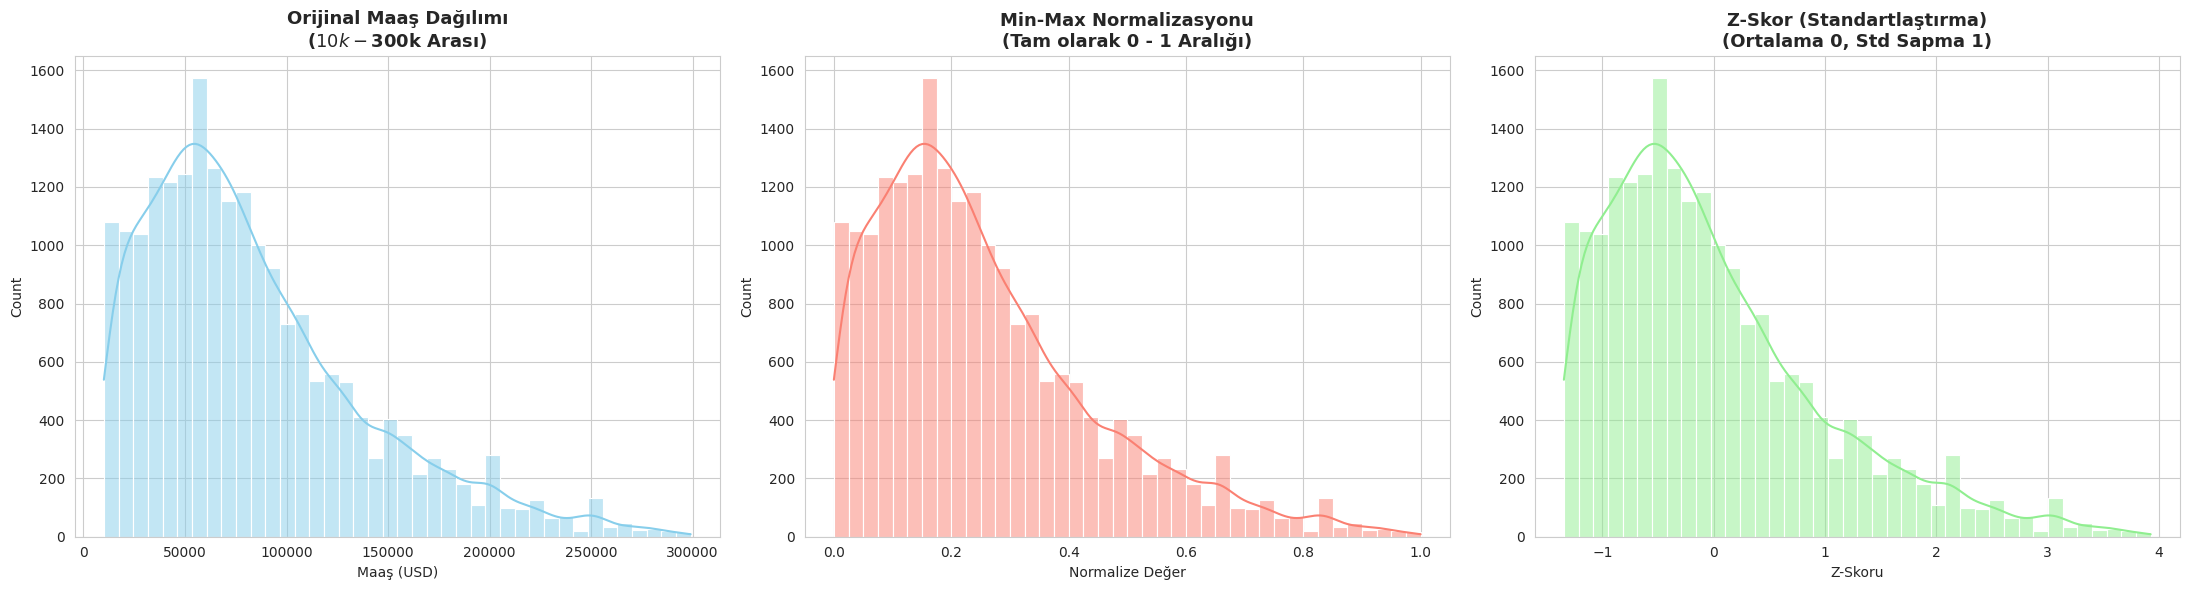

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. VERİ TEMİZLEME: Analizi bozan uç değerleri (16M$ gibi) ve hatalı girişleri ($0 gibi) filtreleyelim
# Bu sayede histogramlar "tek sütun" görünmekten kurtulacak.
df_clean = df[(df['ConvertedCompYearly'] > 10000) & (df['ConvertedCompYearly'] < 300000)].copy()

# 2. NORMALLEŞTİRME HESAPLAMALARI (Temiz veri üzerinden)
# Min-Max Normalizasyonu
min_val = df_clean['ConvertedCompYearly'].min()
max_val = df_clean['ConvertedCompYearly'].max()
df_clean['ConvertedCompYearly_MinMax'] = (df_clean['ConvertedCompYearly'] - min_val) / (max_val - min_val)

# Z-Skor Normalizasyonu
mean_val = df_clean['ConvertedCompYearly'].mean()
std_val = df_clean['ConvertedCompYearly'].std()
df_clean['ConvertedCompYearly_Zscore'] = (df_clean['ConvertedCompYearly'] - mean_val) / std_val

# 3. GÖRSELLEŞTİRME
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
sns.set_style("whitegrid")

# --- GRAFİK 1: Orijinal Dağılım (Temizlenmiş) ---
sns.histplot(df_clean['ConvertedCompYearly'], bins=40, ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Orijinal Maaş Dağılımı\n($10k - $300k Arası)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Maaş (USD)')

# --- GRAFİK 2: Min-Max Normalizasyonu ---
sns.histplot(df_clean['ConvertedCompYearly_MinMax'], bins=40, ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Min-Max Normalizasyonu\n(Tam olarak 0 - 1 Aralığı)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Normalize Değer')

# --- GRAFİK 3: Z-Skor Normalizasyonu ---
sns.histplot(df_clean['ConvertedCompYearly_Zscore'], bins=40, ax=axes[2], color='lightgreen', kde=True)
axes[2].set_title('Z-Skor (Standartlaştırma)\n(Ortalama 0, Std Sapma 1)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Z-Skoru')

plt.tight_layout()
plt.show()

"""
Şekil Aynı Kalır: Üç grafiğin de "tepe noktaları" ve "kuyrukları" birbirine çok benzerdir. Normalleştirme verinin özünü (şeklini) değiştirmez, sadece eksen üzerindeki rakamları değiştirir.

Eksenler Değişir: * Orijinal grafikte eksen 0 ile 16.000.000 arasındadır.

Min-Max grafiğinde eksen tam olarak 0.0 ile 1.0 arasındadır.

Z-skor grafiğinde eksen 0'ın etrafında (merkezi 0 olacak şekilde) toplanır.

Uç Değer Etkisi: 16 milyon dolar o kadar büyüktür ki, çoğu katılımcı (65.000$ alanlar) grafiğin en başında çok ince ve uzun bir sütun olarak görünür. Geri kalan kısım ise uç değer yüzünden boş görünür.
"""